<h1> Herzlich Willkomen zur Präsentation des SQLite Teams! </h1>

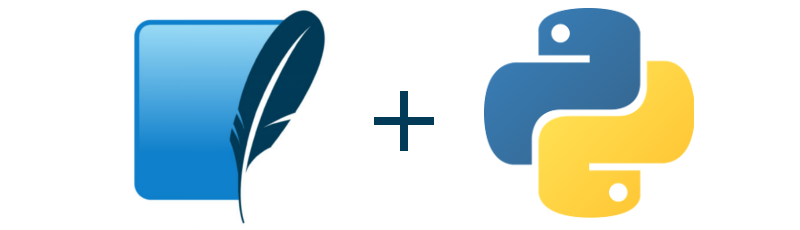

<h1>Inhalt</h1>

1. Teil 1
  1. Einführung
  2. ER - Diagramme
  3. Meta-Informationen (PRGAMA)
2. Teil 2
  1. Join-Befehle
  2. Subqueries
  3. OLAP vs. OLPT
3. Teil 3
  1. Sternschema
  2. Transformation in Sternschema
  3. Abschluss


<h1> Einführung </h1>
Wir sind eine Firma, welche Daten für Unternehmen auswertet. Eine Tierhandlung hat uns Zugriff auf ihre Datenbank gegeben, um herauszufinden welcher ihrer Mitarbeiter der Beste ist. Leider hat die IT-Abteilung vergessen und mitzuteilen wie die Datenbank aufgebaut ist.


In [1]:
#imports 
import sqlite3
import pandas as pd

In [2]:
#get from Git
%cd /content/
%rm -r ./2022TeamBDataEngineeringBC
!git clone https://github.com/Fuenfgeld/2022TeamBDataEngineeringBC.git
%cd ./2022TeamBDataEngineeringBC/

[WinError 2] Das System kann die angegebene Datei nicht finden: '/content/'
C:\Users\jungc


UsageError: Line magic function `%rm` not found.


In [3]:
#connect to DB
conn = sqlite3.connect('sqlite_example.db')
cursor = conn.cursor()
print("Opened database successfully");

Opened database successfully


In [4]:
#Delete Tables in case they exist
cursor.execute("DROP TABLE IF EXISTS food")
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS animals")
cursor.execute("DROP TABLE IF EXISTS customer")
#cursor.execute("DROP TABLE IF EXISTS producer")
cursor.execute("DROP TABLE IF EXISTS customer_buys_food")
cursor.execute("DROP TABLE IF EXISTS employee")
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("DROP TABLE IF EXISTS food_new")
cursor.execute("DROP TABLE IF EXISTS customer_new")
cursor.execute("DROP TABLE IF EXISTS employee_new")
#cursor.execute("DROP TABLE IF EXISTS employee_sells_to_customer")

In [5]:
#load CSVs
food = pd.read_csv('tables/initial_tables/Futter.csv', sep=";")
customer = pd.read_csv('tables/initial_tables/Kunden.csv', sep=";")
animals = pd.read_csv('tables/initial_tables/Tiere.csv', sep=";")
orders = pd.read_csv('tables/initial_tables/Order.csv', sep=";")
employee = pd.read_csv('tables/initial_tables/Verkaeufer.csv', sep=";")
customer_buys_food = pd.read_csv('tables/initial_tables/Customer_buys_Food.csv', sep=";")

In [6]:
#Create Tables
cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer (
			customer_ID int primary key,
            name nvarchar(50),
			postal_code nvarchar(5),
			city nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS employee (
			employee_ID int primary key,
            name nvarchar(50),
            gender nvarchar(1),
			wage int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS food (
			food_ID int primary key,
            name nvarchar(50),
			price_per_kg float,
            producer nvarchar(50),
            origin nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS animals (
            name nvarchar(50) primary key,
			food int,
			foreign key(food) references food(food_ID)
			)
               ''') 
cursor.execute('''
		CREATE TABLE IF NOT EXISTS orders (
            order_Nr int primary key,
            date Date,
            transact int
			)
               ''')


cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer_buys_food (
            C_ID int,
            F_ID int,
			amount int,
            O_ID int,
            E_ID int,
            foreign key(C_ID) references customer(customer_ID)
			foreign key(F_ID) references food(food_ID)
            foreign key(O_ID) references orders(order_Nr)
            foreign key(E_ID) references employee(employee_ID)
			)
               ''') 

In [7]:
#Insert into table
customer.to_sql('customer', conn, if_exists='append', index=False)
animals.to_sql('animals', conn, if_exists='append', index=False)
food.to_sql('food', conn, if_exists='append', index=False)
orders.to_sql('orders', conn, if_exists='append', index=False)
employee.to_sql('employee', conn, if_exists='append', index=False)
customer_buys_food.to_sql('customer_buys_food', conn, if_exists='append', index=False)

<h1> Was ist ein ER-Diagramm? </h1>

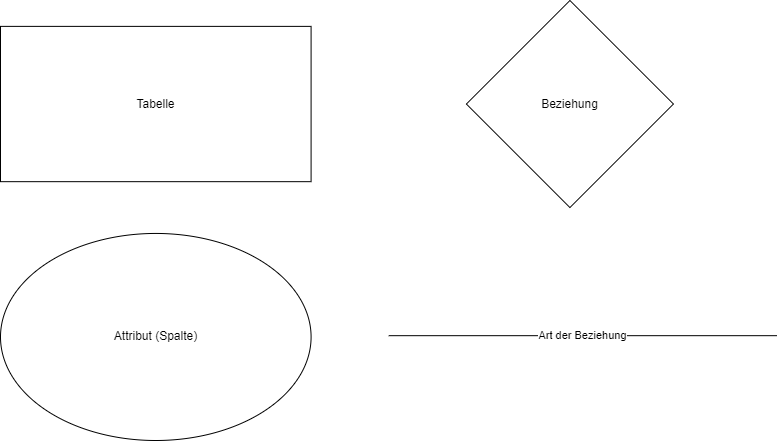


<h1> Mithilfe der Meta-Informationen die Struktur herausfinden </h1>

In [8]:
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))

                 name
0            customer
1            employee
2                food
3             animals
4              orders
5  customer_buys_food


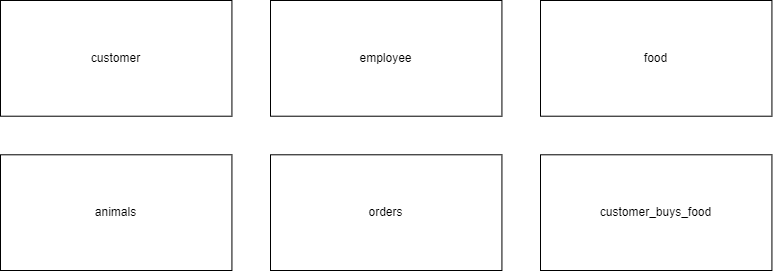

In [18]:
print(pd.read_sql_query("PRAGMA table_info('orders')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('animals')", conn))

   cid      name  type  notnull dflt_value  pk
0    0  order_Nr   int        0       None   1
1    1      date  Date        0       None   0
2    2  transact   int        0       None   0
--------------------------------------------------------
   cid          name          type  notnull dflt_value  pk
0    0       food_ID           int        0       None   1
1    1          name  nvarchar(50)        0       None   0
2    2  price_per_kg         float        0       None   0
3    3      producer  nvarchar(50)        0       None   0
4    4        origin  nvarchar(50)        0       None   0
--------------------------------------------------------
   cid  name          type  notnull dflt_value  pk
0    0  name  nvarchar(50)        0       None   1
1    1  food           int        0       None   0


In [10]:
print(pd.read_sql_query("PRAGMA table_info('customer')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('customer_buys_food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('employee')", conn))

   cid         name          type  notnull dflt_value  pk
0    0  customer_ID           int        0       None   1
1    1         name  nvarchar(50)        0       None   0
2    2  postal_code   nvarchar(5)        0       None   0
3    3         city  nvarchar(50)        0       None   0
--------------------------------------------------------
   cid    name type  notnull dflt_value  pk
0    0    C_ID  int        0       None   0
1    1    F_ID  int        0       None   0
2    2  amount  int        0       None   0
3    3    O_ID  int        0       None   0
4    4    E_ID  int        0       None   0
--------------------------------------------------------
   cid         name          type  notnull dflt_value  pk
0    0  employee_ID           int        0       None   1
1    1         name  nvarchar(50)        0       None   0
2    2       gender   nvarchar(1)        0       None   0
3    3         wage           int        0       None   0


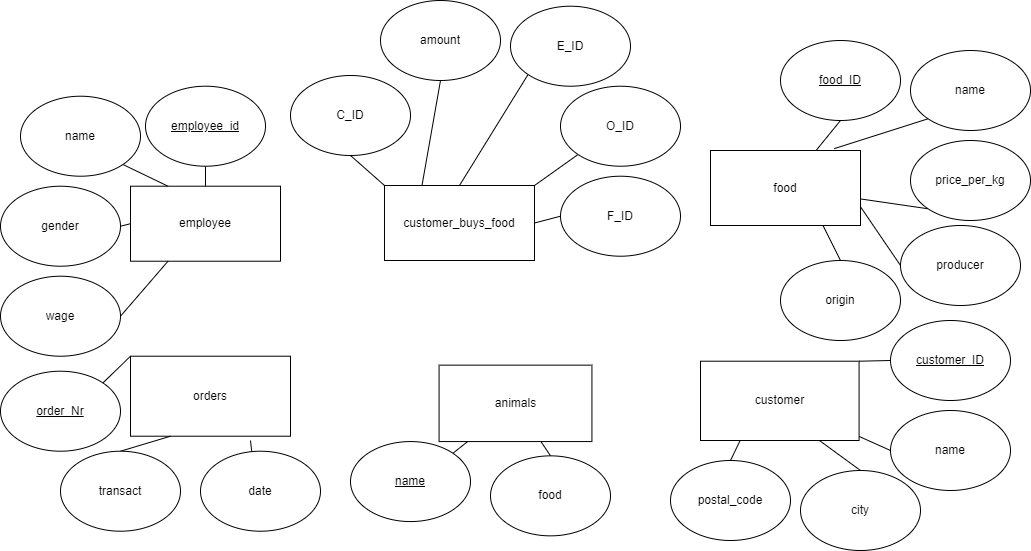

In [25]:
print(pd.read_sql_query("PRAGMA foreign_key_list('orders')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('food')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('Animals')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('customer')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('customer_buys_food')", conn))
print("---------------------------------------------------")
print(pd.read_sql_query("PRAGMA foreign_key_list('employee')", conn))

Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []
---------------------------------------------------
Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []
---------------------------------------------------
   id  seq table  from       to  on_update  on_delete match
0   0    0  food  food  food_ID  NO ACTION  NO ACTION  NONE
---------------------------------------------------
Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []
---------------------------------------------------
   id  seq     table  from           to  on_update  on_delete match
0   0    0  employee  E_ID  employee_ID  NO ACTION  NO ACTION  NONE
1   1    0    orders  O_ID     order_Nr  NO ACTION  NO ACTION  NONE
2   2    0      food  F_ID      food_ID  NO ACTION  NO ACTION  NONE
3   3    0  customer  C_ID  customer_ID  NO ACTION  NO ACTION  NONE
---------------------------------------------------
Empty D

<h1> Teil 2 </h1>

<h2> Subselect </h2>

In [20]:
print(pd.read_sql_query('''
    SELECT * FROM orders
    WHERE orders.order_Nr IN
        (SELECT customer_buys_food.O_ID FROM customer_buys_food
    WHERE customer_buys_food.E_ID IN
       (SELECT employee_ID FROM employee WHERE employee.wage > 2000))
    ''', conn))

   order_Nr        date  transact
0         2  2021-04-25         1
1         6  2021-10-23         4
2         7  2022-01-20         5
3         8  2022-02-15         5
4        10  2022-03-22         6
5        11  2022-03-23         6
6        12  2022-03-23         3


<h2> Joins </h2>

In [23]:
##Wie viel Geld hat jeder Kunder ausgegeben?
print(pd.read_sql_query('''
    SELECT 
    customer.name, customer_buys_food.amount,food.price_per_kg,
    food.price_per_kg*customer_buys_food.amount as sum
    FROM customer
    LEFT JOIN 
    customer_buys_food  ON customer.customer_ID = customer_buys_food.C_ID
    INNER JOIN 
    food ON customer_buys_food.F_ID = food.food_ID 
    GROUP BY customer.name
    ''', conn))

        name  amount price_per_kg  sum
0     Becker       1         2,30    2
1    Fischer       5         4,00   20
2   Hoffmann       2        10,00   20
3      Meyer       1         4,00    4
4    Mueller       5        10,00   50
5    Schmidt       2         0,65    0
6  Schneider       3         8,00   24
7     Schulz       2         0,65    0
8     Wagner       3         8,00   24
9      Weber       2         2,30    4


<h2> OLAP vs. OLPT </h2>

<h3>Einsatz</h3>

<h3>Ziele</h3>

<h1> Teil 3 </h1>

In [21]:
cursor.execute('''PRAGMA foreign_keys = OFF;''')  # disable foreign keys
conn.commit()


cursor.execute('''CREATE TABLE IF NOT EXISTS food_new(
                  food_id INT PRIMARY KEY,
                  name TEXT,
                  price_per_kg FLOAT,
                  producer TEXT,
                  origin TEXT,
                  animal TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS customer_new(
                  cust_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  postal_code nvarchar(5),
                  city TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS employee_new(
                  empl_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  gender nvarchar(1),
                  wage INT
                  );''')

conn.commit()


cursor.execute('''INSERT INTO food_new(food_id, name, price_per_kg, producer, origin)
                  SELECT food_ID, name, price_per_kg, producer, origin
                  FROM food;
                  ''')
conn.commit()
cursor.execute(''' SELECT * FROM food_new;''')
cursor.execute(''' PRAGMA table_info(food_new);''')
records = cursor.fetchall()

cursor.execute('''INSERT INTO employee_new(empl_id, name, gender, wage)
                  SELECT employee_ID, name, gender, wage
                  FROM employee;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM employee_new;''')
records = cursor.fetchall()

    
    
cursor.execute(''' SELECT * FROM customer_new;''')
cursor.execute(''' PRAGMA table_info(customer_new);''')
records = cursor.fetchall()

    
cursor.execute('''INSERT INTO customer_new(cust_id, name, postal_code, city)
                  SELECT customer_ID, name, postal_code, city
                  FROM customer;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM customer_new;''')
records = cursor.fetchall()

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
                  order_nr  INT PRIMARY KEY NOT NULL UNIQUE,
                  transact,
                  date DATE,
                  custumer_id int, 
                  food_id INT,
                  amount INT,
                  employee_id INT,
                  foreign key(food_id) references food_new(food_id),
                  foreign key(custumer_id) references customer_new(cust_id),
                  foreign key(employee_id) references employee_new(empl_id)
                  );''')

In [ ]:
cursor.execute('''INSERT INTO sales( order_nr, transact, date, custumer_id, food_id, amount,employee_id )
                  SELECT order_Nr,transact, date, C_ID, food_ID, amount, E_ID FROM orders
    LEFT JOIN customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN food ON customer_buys_food.F_ID = food.food_ID;
    ''')